In [ ]:
!pip install pymoo

     |████████████████████████████████| 2.5 MB 5.7 MB/s 
     |████████████████████████████████| 239 kB 68.0 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.factory import get_termination
from pymoo.optimize import minimize
import autograd.numpy as anp

In [ ]:
class MyProblem(Problem):
  def __init__(self):
    super().__init__(
        n_var=2,
        n_obj=2,
        n_constr=2,
        xl=anp.array([0.,0.]),
        xu=anp.array([1.,1.]),
    )

  def _evaluate(self, x, out, *args, **kwargs):
    f1 = x[:,0]*(x[:,1]-1)
    f2 = x[:,0]**2 + x[:,1]**2

    g1 = (x[:,1] - x[:,0])
    g2 = (x[:,0] - 4*x[:,1])

    out['F'] = anp.column_stack([f1,f2])
    out['G'] = anp.column_stack([g1,g2])

  
problem = MyProblem()

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover('real_sbx', prob=.9, eta=15),
    mutation=get_mutation('real_pm', eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 100)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=False)

X = res.X
F = res.F

In [ ]:
def f1(x):
  return x[0] * (x[1]-1)

def f2(x):
  return x[0]**2 + x[1]**2

In [ ]:
F.shape

(100, 2)

In [ ]:
xs = np.linspace(0,1, 100)

x1, x2 = np.meshgrid(xs,xs)

res_f1 = f1([x1,x2])
res_f2 = f2([x1,x2])

g1 = (x2 <= x1)
g2 = (x1 <= 4*x2)

res_f1 = f1([x1,x2])
res_f2 = f2([x1,x2])

Text(0, 0.5, '$f_2$')

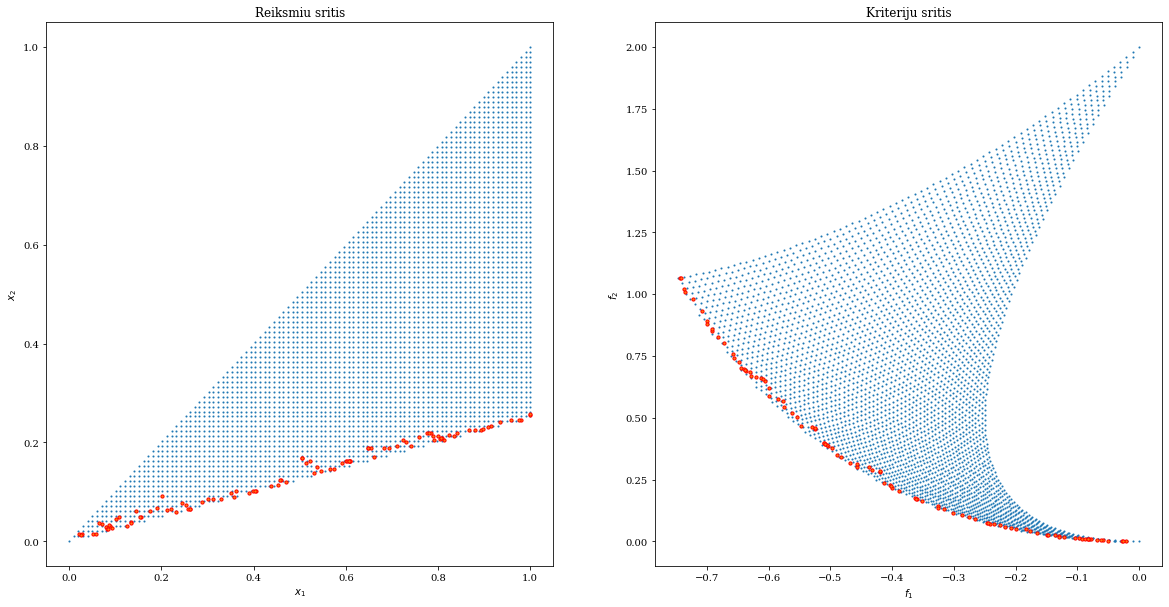

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
#Reiksmiu sritis
ax[0].scatter(x1[g1 & g2],x2[g1 & g2],s=1.1)
ax[0].scatter(X[:,0], X[:,1], s=10, edgecolors='r')
ax[0].set_title('Reiksmiu sritis')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

#Kriteriju sritis
ax[1].scatter(res_f1[g1 & g2], res_f2[g1 & g2], s=1.1)
# Pareto reiksmes
ax[1].scatter(F[:,0], F[:,1], s=10, edgecolors='r')
ax[1].set_title('Kriteriju sritis')
ax[1].set_xlabel('$f_1$')
ax[1].set_ylabel('$f_2$')
